## Task 6.6

### I used the personal savings rate data because it has some relation to my project my adidas sata sales dataset covers data from 2020 to 2021 and in this data also there is a sudden increase in personal savings rate from 2020 which made me curious if there is any correlation between the two datasets

In [75]:
#Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [76]:
quandl.ApiConfig.api_key = 'oAEdZyxsDBJjSjdpuJhh'

In [101]:
# Personal saving rate in percentage dataset
df= quandl.get('FRED/PSAVERT')

In [78]:
df.head(5)

,Value
Date,
1959-01-01,11.3
1959-02-01,10.6
1959-03-01,10.3
1959-04-01,11.2
1959-05-01,10.6


In [79]:
df.shape

(756, 1)

In [80]:
df.columns

Index(['Value'], dtype='object')

In [81]:
type(df)

pandas.core.frame.DataFrame

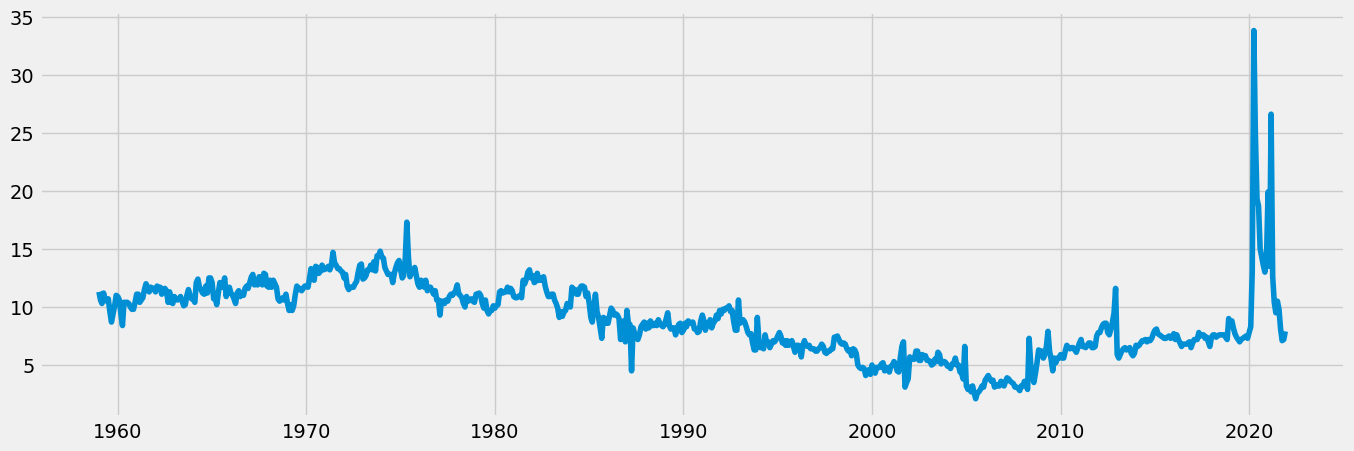

In [82]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

## 03. Subsetting and cleaning dataset

In [83]:
# Reset index so that you can use the "Date" column as a filter

df_2 = df.reset_index()

In [84]:
df_2.head()

,Date,Value
0,1959-01-01,11.3
1,1959-02-01,10.6
2,1959-03-01,10.3
3,1959-04-01,11.2
4,1959-05-01,10.6


In [85]:
data_sub = df_2.loc[(df_2['Date'] >= '1980-01-01') & (df_2['Date'] < '2020-06-01')]

In [86]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1980-01-01,9.9
1980-02-01,10.1
1980-03-01,10.2
1980-04-01,11.3
1980-05-01,11.4


## 04. Line chart

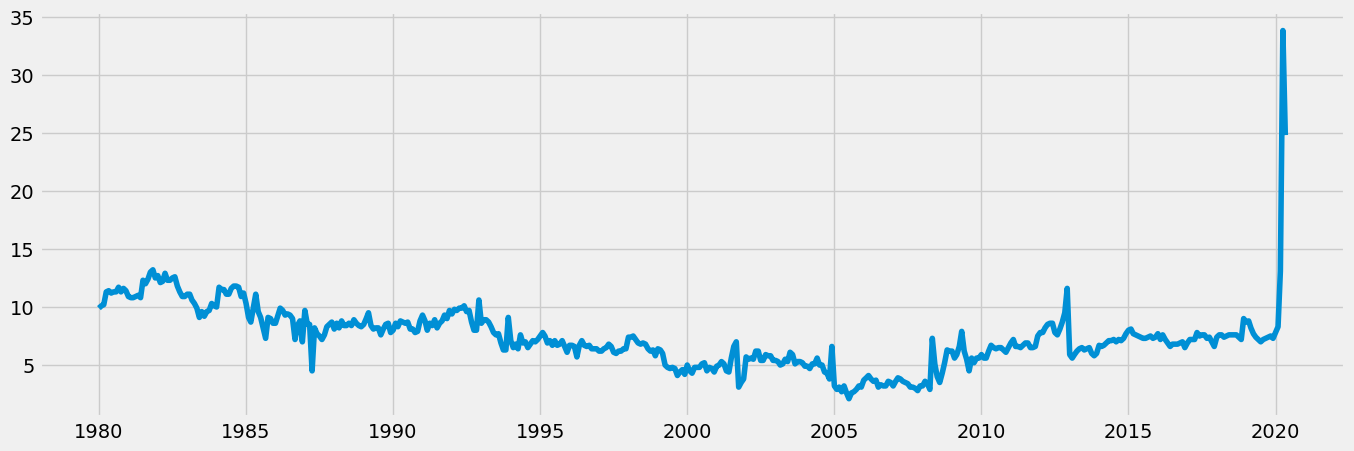

In [104]:
# Plotting the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [105]:
# Check for missing values 

data_sub.isnull().sum() 

Value    0
dtype: int64

## 05. Time series analysis- Decomposing

In [90]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [91]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

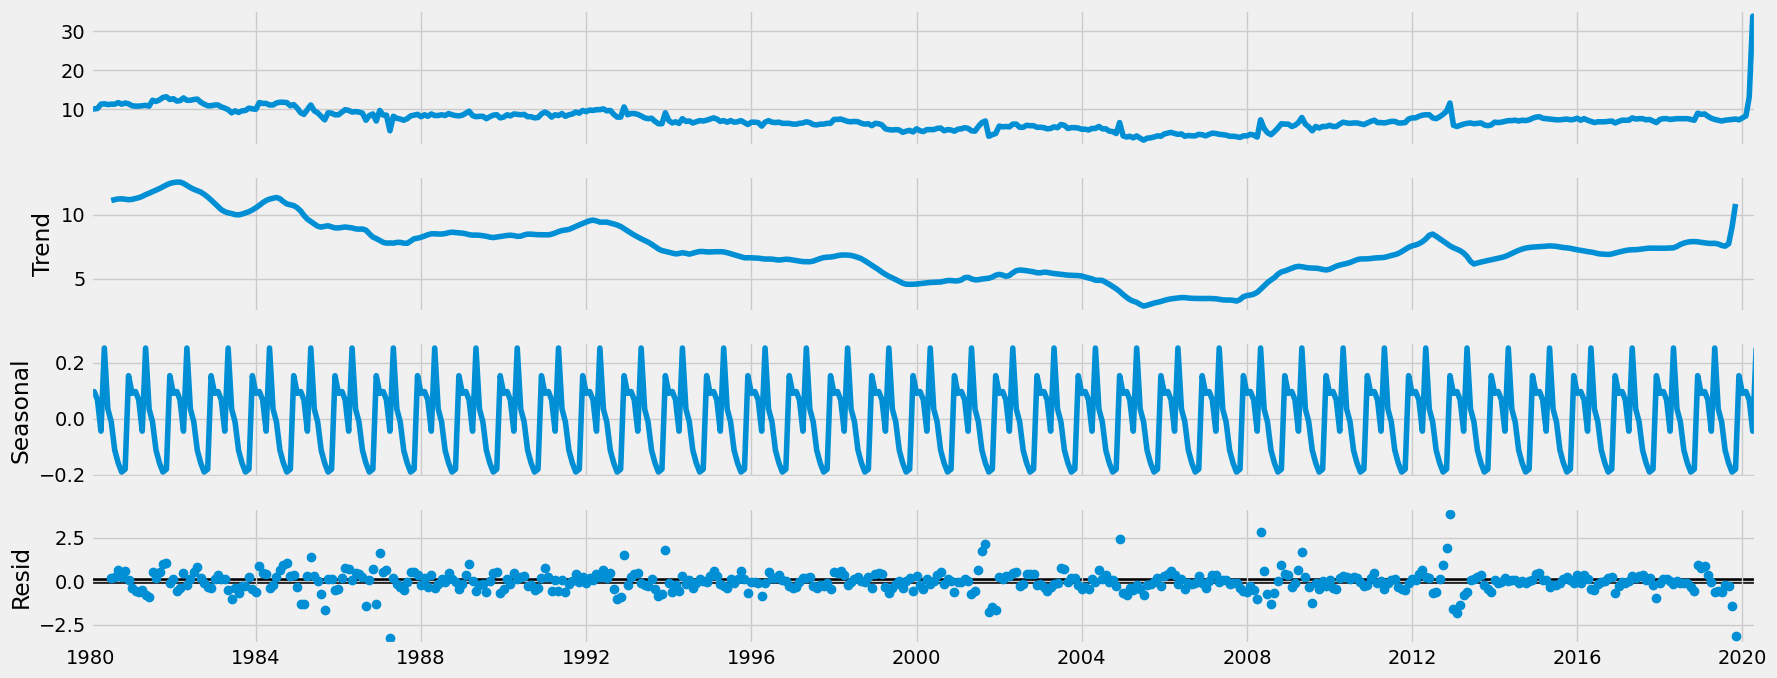

In [92]:
# Plot the separate components

decomposition.plot()
plt.show()

### From the plot we can see that the personal saving rate decreased from 1980 to 2006 and started increasing again slightly until 2019 and during 2020 there was sudden peak in personal savings. I found from multiple sources that the sudden increase in personal saving in 2020 is due to the covid-19 pandemic

## 06. Dickey-Fuller test for stationarity

In [93]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.910356
p-value                          0.784543
Number of Lags Used              3.000000
Number of Observations Used    481.000000
Critical Value (1%)             -3.444018
Critical Value (5%)             -2.867568
Critical Value (10%)            -2.569980
dtype: float64


### The test statistic value is larger than the critical values so we must stationarize the data further

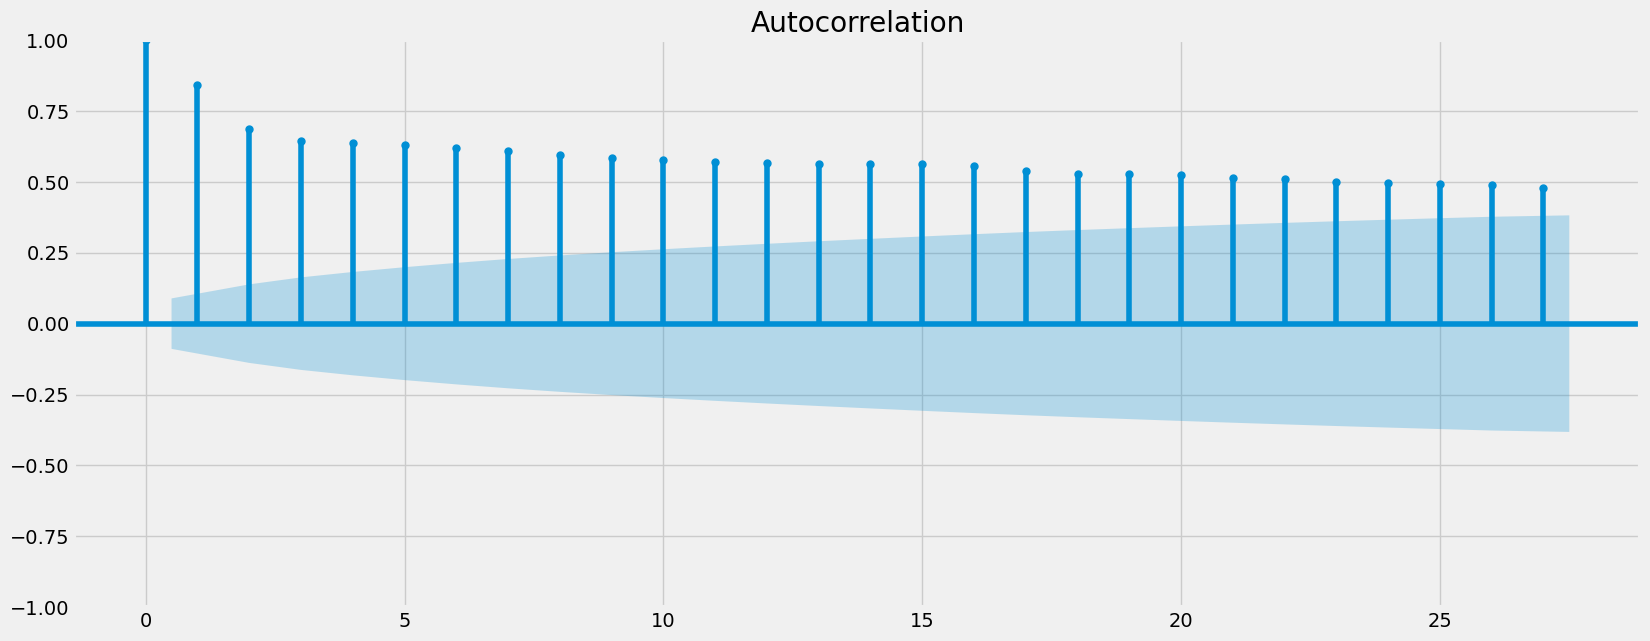

In [94]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### There are lot of lags which are above the confidence level. So we can say that the data is non stationary due to majority of the data being auto-correlated

## 07. Differencing and again testing for stationarity

In [102]:
# New time series
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [103]:
# Remove the missing values
data_diff.dropna(inplace = True) 

In [97]:
data_diff.head()

,Value
datetime,
1980-02-01,0.2
1980-03-01,0.1
1980-04-01,1.1
1980-05-01,0.1
1980-06-01,-0.2


In [98]:
data_diff.columns

Index(['Value'], dtype='object')

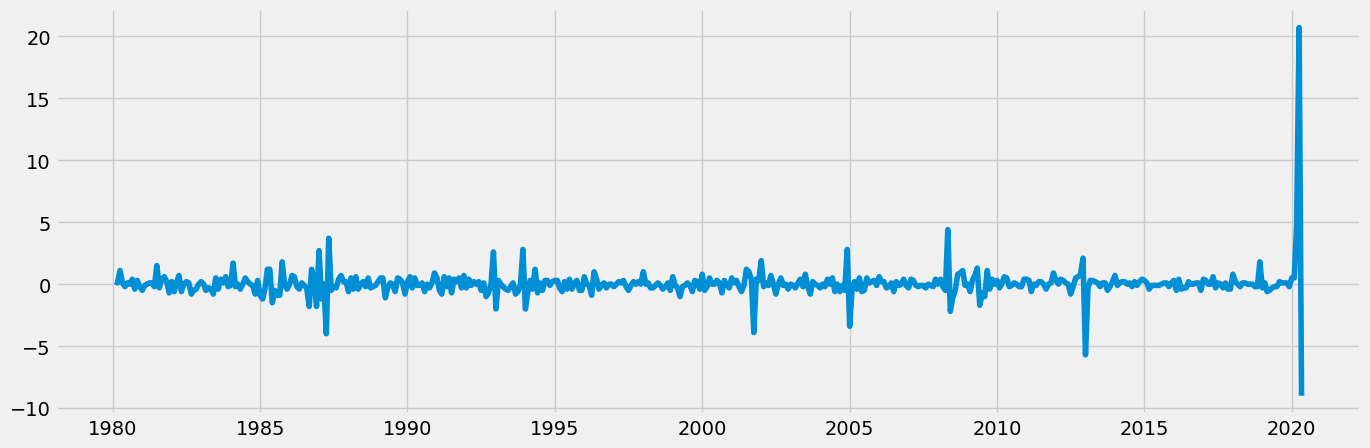

In [99]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [106]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.239904e+01
p-value                        4.605074e-23
Number of Lags Used            2.000000e+00
Number of Observations Used    4.810000e+02
Critical Value (1%)           -3.444018e+00
Critical Value (5%)           -2.867568e+00
Critical Value (10%)          -2.569980e+00
dtype: float64


### The test statistic is much higher than the critical values and the p-values is much lower than 0.05 which makes the data stationary

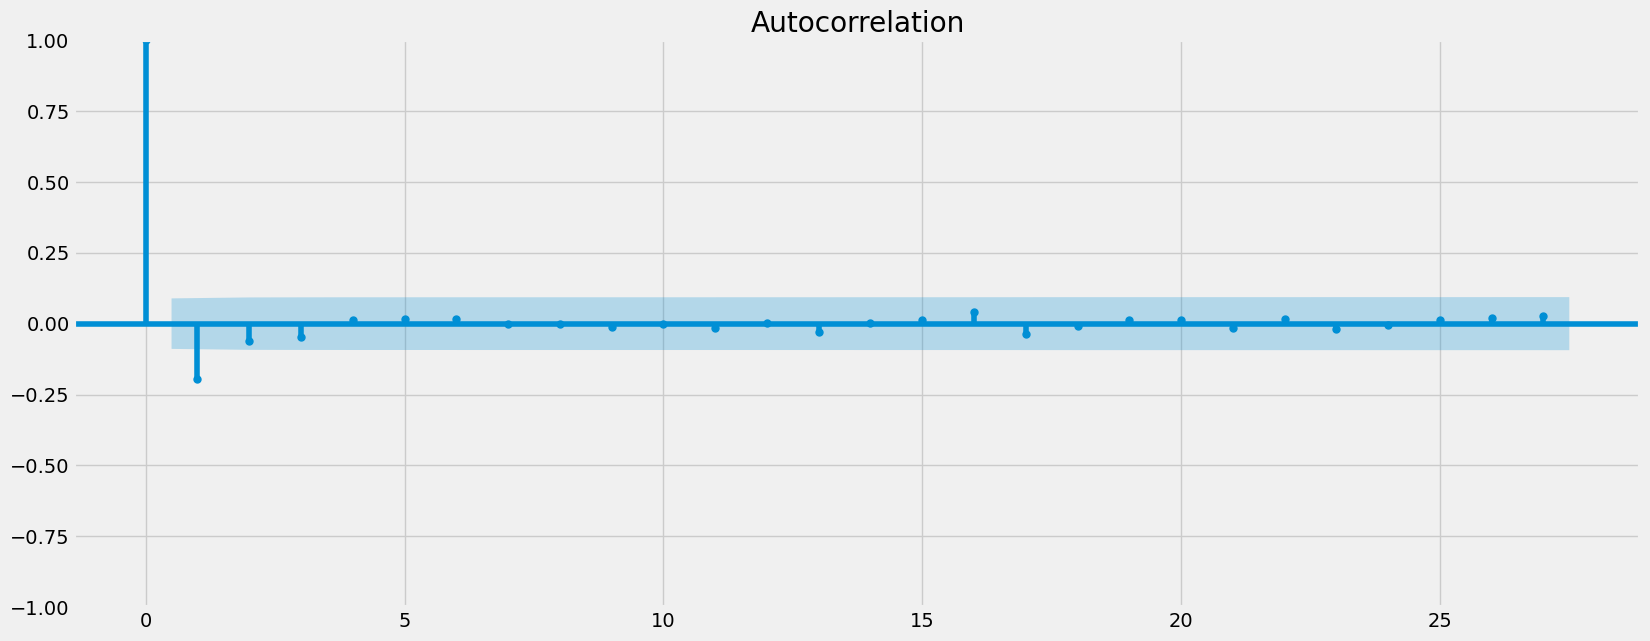

In [100]:
plot_acf(data_diff)
plt.show()

### There is almost no lag in the data as the points are within the confidence level so the data isnt auto-correlated which makes it stationary

### Less than 10 data points above the confidence level so data differencing is not needed again